# 6.5 Unsupervised Machine Learning

# Index

## 1. Import libraries and data
## 2. Renaming columns
## 3. Standardizing data
## 4. The Elbow Technique
## 5. K-means clustering

# 1. Import Libraries and Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # pylab is a convience model that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler

In [26]:
# This line ensures the graphs created are displayed in the notebook without being called
%matplotlib inline

In [27]:
# create path
path = r'C:\Users\Spero\Documents\Boat Sales Analysis'

In [28]:
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col = False)

In [29]:
df_boat.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Currency,EURO Price,Country,City
0,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490.0,Germany,BÃ¶nningstedt
1,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399.0,Germany,Bayern
2,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,CHF,3535.0,Switzerland,Seengen
3,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,EUR,3500.0,Italy,Lake Garda
4,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,CHF,4646.0,Switzerland,Zugersee


## Clean Data

In [30]:
# Renaming column
df_boat.rename(columns = {'Number of views last 7 days': '7_days_views'}, inplace = True)

In [31]:
df = df_boat[['Length', 'Width', '7_days_views', 'EURO Price']]

In [32]:
df

,Length,Width,7_days_views,EURO Price
0,4.00,1.50,75,3490.00
1,3.55,1.46,58,3399.00
2,4.35,1.75,239,3535.00
3,4.70,2.00,69,3500.00
4,4.40,1.65,113,4646.00
...,...,...,...,...
5996,7.20,2.70,1299,5050.00
5997,6.00,2.10,1917,5048.99
5998,6.00,1.62,288,4999.50
5999,4.40,1.80,354,4499.00


In [33]:
df.shape

(6001, 4)

# 3. Standardizing Data

In [34]:
# standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36229761]
 [-1.50289423 -1.8047781  -0.62569917 -0.36244028]
 [-1.33784374 -1.53402117  0.43094436 -0.36222706]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.35993095]
 [-1.32752808 -1.48733894  1.10229246 -0.36071566]
 [-1.49257857 -1.67406786  0.16824293 -0.36178367]]


In [35]:
#converting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  7_days_views  EURO Price
0    -1.410053 -1.767432     -0.526456   -0.362298
1    -1.502894 -1.804778     -0.625699   -0.362440
2    -1.337844 -1.534021      0.430944   -0.362227
3    -1.265634 -1.300610     -0.561483   -0.362282
4    -1.327528 -1.627386     -0.304620   -0.360485
...        ...       ...           ...         ...
5996 -0.749851 -0.647059      6.619022   -0.359852
5997 -0.997427 -1.207246     10.226789   -0.359853
5998 -0.997427 -1.655395      0.716997   -0.359931
5999 -1.327528 -1.487339      1.102292   -0.360716
6000 -1.492579 -1.674068      0.168243   -0.361784

[6001 rows x 4 columns]


# 4. The Elbow Technique

In [36]:
num_cl = range(1, 10) # defines the range of the potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines the k-means clusters in the range assigned above

In [37]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # creates a score to represent the range of the variation for the given cluster option

In [38]:
score

[-24004.0,
 -15675.06113994856,
 -11918.329353520397,
 -9074.32713363475,
 -7104.565723139941,
 -6077.306766474007,
 -5329.4198236743705,
 -4620.155551780835,
 -4131.537476802525]

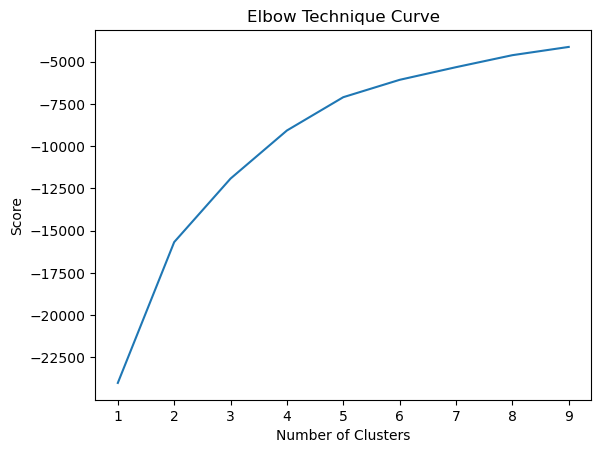

In [39]:
# Plot the elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Technique Curve')
pl.show()

# The line begins to straiten out a bit around 5 on the x-axis. This means the optimal count for clusters will be 5

# 5. K-means clustering

In [40]:
# create an object for k-means
kmeans = KMeans(n_clusters = 5)

In [41]:
# fit the k-means into the data
kmeans.fit(df)

KMeans(n_clusters=5)

In [42]:
df['clusters'] = kmeans.fit_predict(df)

In [43]:
df.head()

,Length,Width,7_days_views,EURO Price,clusters
0,-1.410053,-1.767432,-0.526456,-0.362298,4
1,-1.502894,-1.804778,-0.625699,-0.362440,4
2,-1.337844,-1.534021,0.430944,-0.362227,4
3,-1.265634,-1.300610,-0.561483,-0.362282,4
4,-1.327528,-1.627386,-0.304620,-0.360485,4


In [44]:
df['clusters'].value_counts()

4    2917
0    2236
1     498
2     320
3      30
Name: clusters, dtype: int64

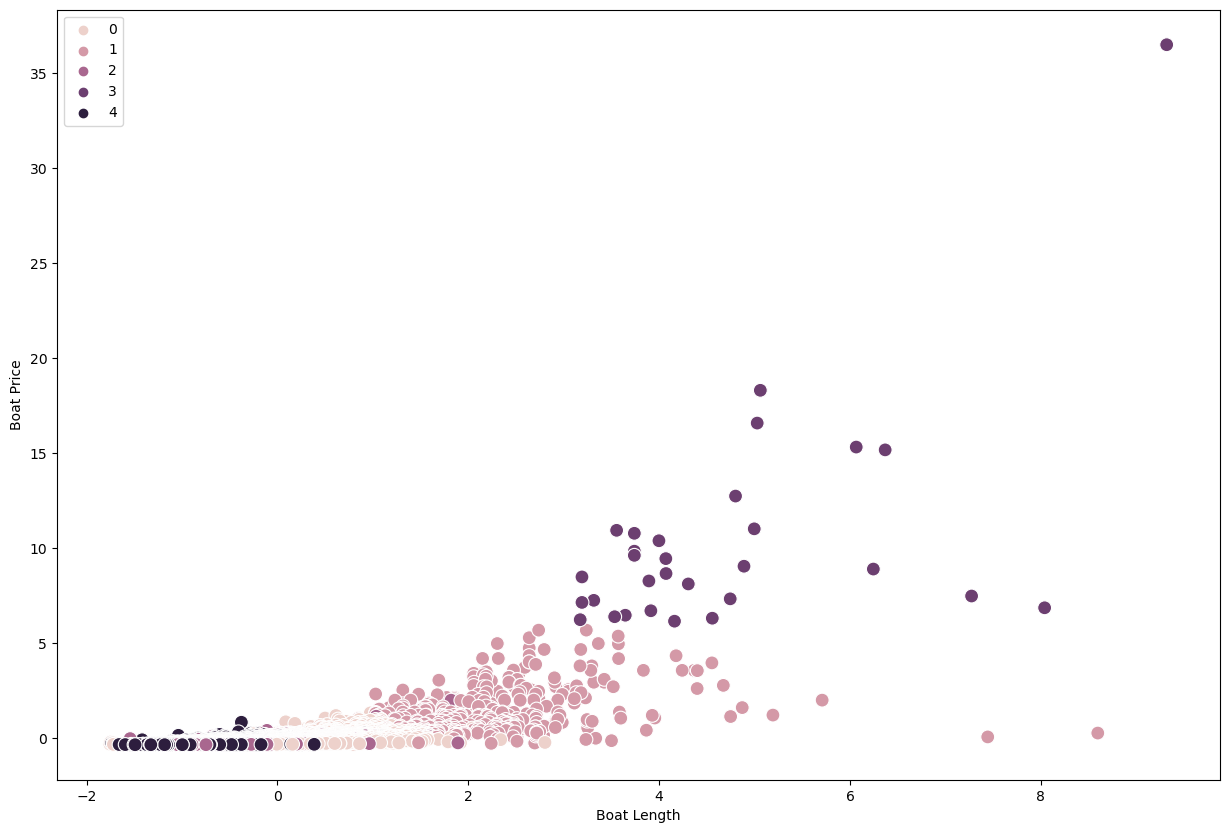

In [45]:
# plot the clusters for variables EURO Price and Length
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df['Length'], y=df['EURO Price'], hue=kmeans.labels_, s=100)
# x and y are subsets for X to avoid using their labels
# s represents the size of the points you see in the plot
ax.grid(False) # to remove the grid from the background
plt.xlabel('Boat Length')
plt.ylabel('Boat Price')
plt.show()

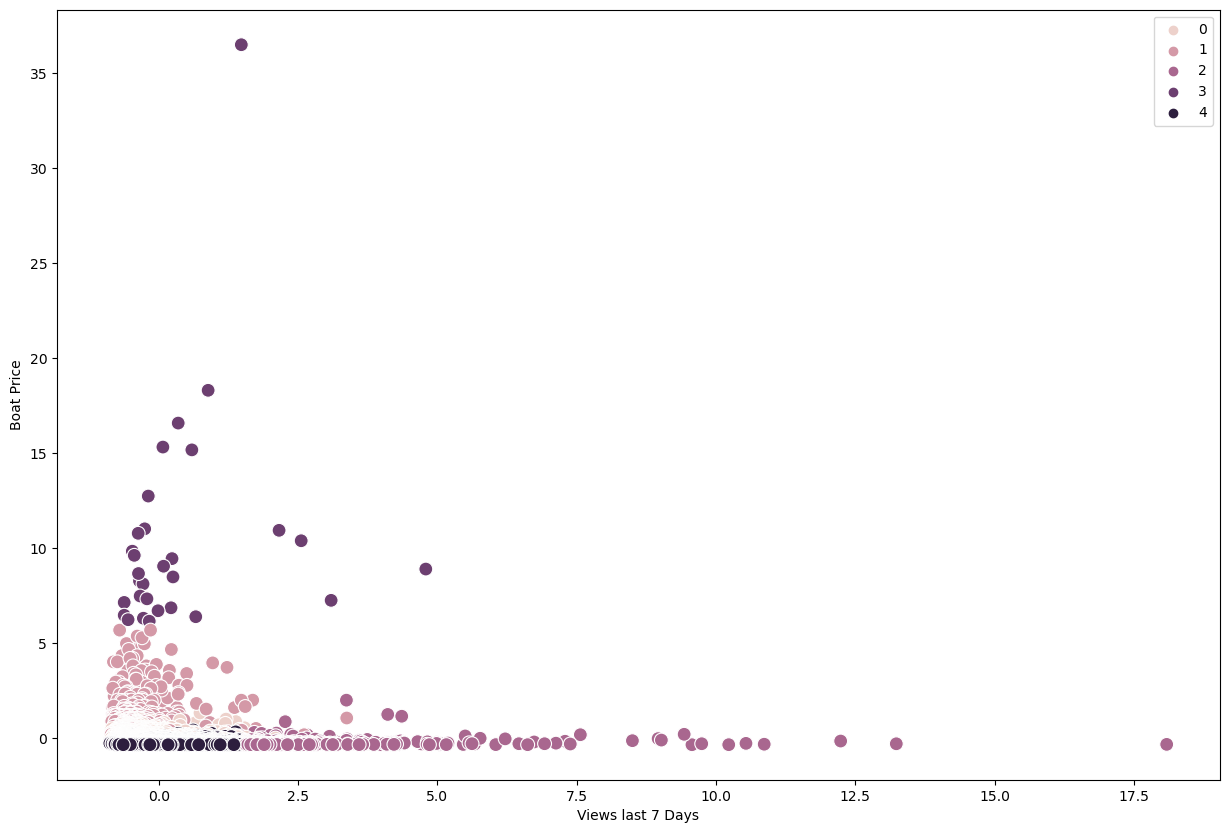

In [46]:
# Plot the clusters for 7_days_views and EURO Price variables
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df['7_days_views'], y=df['EURO Price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Views last 7 Days')
plt.ylabel('Boat Price')
plt.show()

# Analysis of the graphs

## The graphs do not show much insight for the relationship between the boat's price with either the boat's length or the number of views for the boat's listing. This could mean that there are other important factors needed to determine why some listings generate more views than others.

In [47]:
df.loc[df['clusters'] == 4, 'cluster'] = 'purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'red'
df.loc[df['clusters'] == 2, 'cluster'] = 'blue'
df.loc[df['clusters'] == 1, 'cluster'] = 'green'
df.loc[df['clusters'] == 0, 'cluster'] = 'yellow'

In [48]:
df.groupby('cluster').agg({'Length':['mean', 'median'],
                          'Width':['mean', 'median'],
                          '7_days_views':['mean','median'],
                          'EURO Price':['mean', 'median']})

Length               Width           7_days_views            \
             mean    median      mean    median         mean    median   
cluster                                                                  
blue    -0.531707 -0.646695 -0.549668 -0.749760     3.062702  2.427475   
green    2.101251  1.921903  1.912740  1.710394    -0.350853 -0.473916   
purple  -0.682848 -0.692084 -0.741908 -0.787105    -0.051094 -0.170350   
red      4.686912  4.116043  3.758810  3.451641     0.398253 -0.091540   
yellow   0.436039  0.394155  0.570095  0.566679    -0.298858 -0.395106   

        EURO Price            
              mean    median  
cluster                       
blue     -0.242007 -0.310261  
green     1.219285  0.886345  
purple   -0.269361 -0.292513  
red      10.398597  8.764896  
yellow   -0.025042 -0.082579

## This data again does not show insight to the relationship between the columns.
## The purple cluster however stand out as the results are much larger than the other clusters. Which could mean that while there are other factors needed to determine what generates the price and views of each listing width and length are included with these factors.
## Finally, the data above does help show me that the cayegorical variables from the data need to be explored more  in order to better determine how some listings generate more views.

In [49]:
# exporting df as csv file
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustersdataframe.csv'))